In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3/Data') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone3/Notebook
/Users/liuyang/Desktop/Springboard_Capstone3/Data


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df.shape

(1017209, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


No missing value detected

In [136]:
class data_process:
    
    def __init__(self, data):
        self.data = data
        self.count = data.nunique()
        self.va_pct = round(self.count/(data.shape[0])*100,4)
        self.nan_p = nan_p = round(data.isnull().sum()/data.shape[0]*100,4)
        
    
    def data_info(self):
        frame = pd.DataFrame(zip(self.count,self.va_pct,self.nan_p), 
                             index=self.count.index, 
        columns=['counts','unique_value_pct', 'nan_pct']).reset_index().rename(columns={'index': 'column'})

        frame['data_type']= self.data.dtypes.tolist()
        return frame.sort_values('counts', ascending=False)
   

    def convert_datetime(self, datecol):
        self.data[datecol] = pd.to_datetime(self.data[datecol], format='%Y-%m-%d')
    
    
    def convert_dtype(self):
        catcolumns = self.data.select_dtypes(include=['object']).columns.tolist()
        return pd.get_dummies(self.data, columns=catcolumns)
    
    
    def pivot_table(self, index, aggfunc):
        return pd.pivot_table(self.data, index=index, aggfunc=aggfunc)

In [138]:
df_process = data_process(df)

In [125]:
df_process.convert_datetime('Date')

In [128]:
df_process.data_info()

,column,counts,unique_value_pct,nan_pct,data_type
3,Sales,21734,2.1366,0.0,int64
4,Customers,4086,0.4017,0.0,int64
0,Store,1115,0.1096,0.0,int64
2,Date,942,0.0926,0.0,datetime64[ns]
1,DayOfWeek,7,0.0007,0.0,int64
7,StateHoliday,5,0.0005,0.0,object
5,Open,2,0.0002,0.0,int64
6,Promo,2,0.0002,0.0,int64
8,SchoolHoliday,2,0.0002,0.0,int64


In [155]:
df_process.pivot_table('Store', 'sum').drop('DayOfWeek', axis=1)

,Customers,Open,Promo,Sales,SchoolHoliday
Store,,,,,
1,440523,781,360,3716854,193
2,457855,784,360,3883858,167
3,584310,779,360,5408261,170
4,1036254,784,360,7556507,173
5,418588,779,360,3642818,172
...,...,...,...,...,...
1111,351883,779,360,4091076,170
1112,653276,779,360,7974294,170
1113,562151,784,360,5196242,159


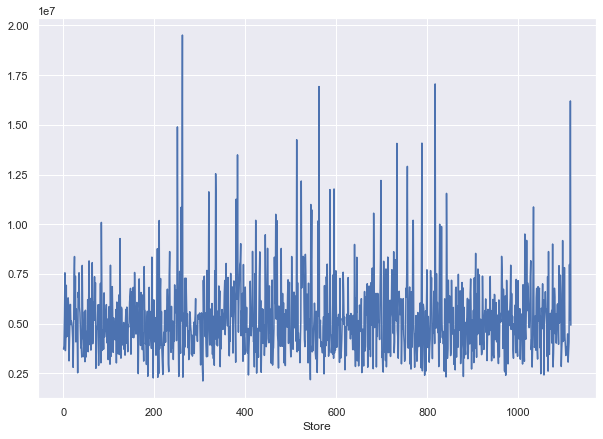

In [142]:
df_process.pivot_table('Store', 'sum').Sales.plot(figsize=(10,7))
plt.show()

In [14]:
import sklearn.cluster

Text(0, 0.5, 'Sum of Squares')

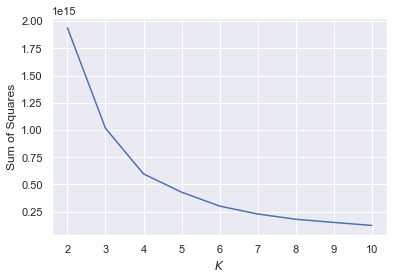

In [15]:
ss = []

# Make an empty dictionary called assignments 
assignments = {}

# Cast your table 'pivoted' as a matrix with as_matrix(), and store it in a variable X 
X = df_store.values

# Make a variable called Krange, and assign it a list of range(2, 11)
Krange  = list(range(2, 11))

# We now want to iterate through this list to construct a plot showing SS for each K. Name the iterator variable K 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    cluster_model = sklearn.cluster.KMeans(n_clusters=K,random_state=10)
    assigned_cluster = cluster_model.fit_predict(X)
    centers = cluster_model.cluster_centers_
    #ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    ss.append(cluster_model.inertia_)
    assignments[str(K)] = assigned_cluster
    
# Call plot() on plt with parameters Krange and ss
plt.plot(Krange, ss)

# Let's label the plot 
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")


In [16]:
assignments

{'2': array([0, 0, 0, ..., 0, 1, 0], dtype=int32),
 '3': array([2, 2, 0, ..., 0, 1, 2], dtype=int32),
 '4': array([2, 2, 0, ..., 0, 1, 0], dtype=int32),
 '5': array([2, 2, 0, ..., 0, 4, 0], dtype=int32),
 '6': array([3, 3, 4, ..., 4, 2, 1], dtype=int32),
 '7': array([2, 5, 0, ..., 0, 6, 0], dtype=int32),
 '8': array([7, 7, 4, ..., 0, 5, 0], dtype=int32),
 '9': array([2, 2, 0, ..., 0, 8, 7], dtype=int32),
 '10': array([7, 7, 3, ..., 3, 2, 1], dtype=int32)}

For n_clusters = 2 The average silhouette_score is : 0.5889239054182888
For n_clusters = 3 The average silhouette_score is : 0.5545923690014646
For n_clusters = 4 The average silhouette_score is : 0.5455505959128739
For n_clusters = 5 The average silhouette_score is : 0.5422527881464116
For n_clusters = 6 The average silhouette_score is : 0.5032244208555817
For n_clusters = 7 The average silhouette_score is : 0.5033748245873546
For n_clusters = 8 The average silhouette_score is : 0.4958168510360807
For n_clusters = 9 The average silhouette_score is : 0.4885998679826962
For n_clusters = 10 The average silhouette_score is : 0.4851322458481681


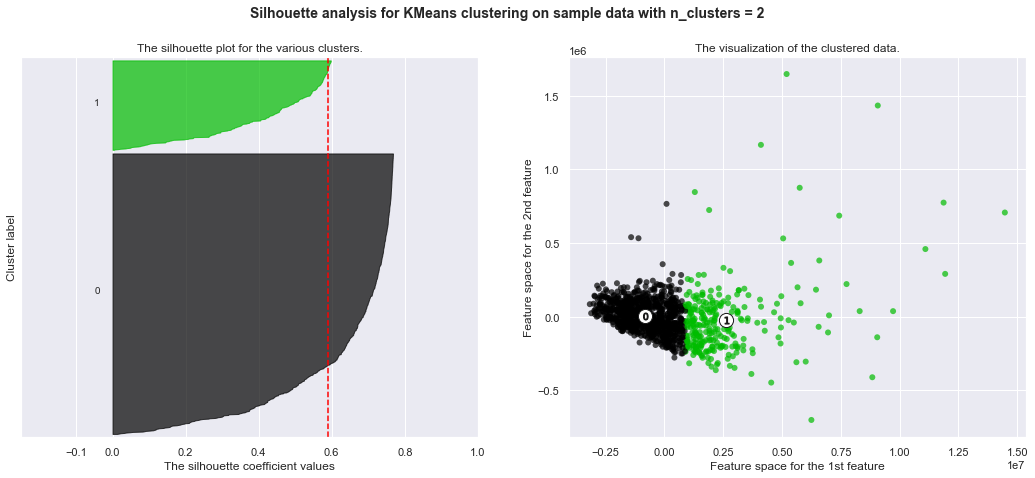

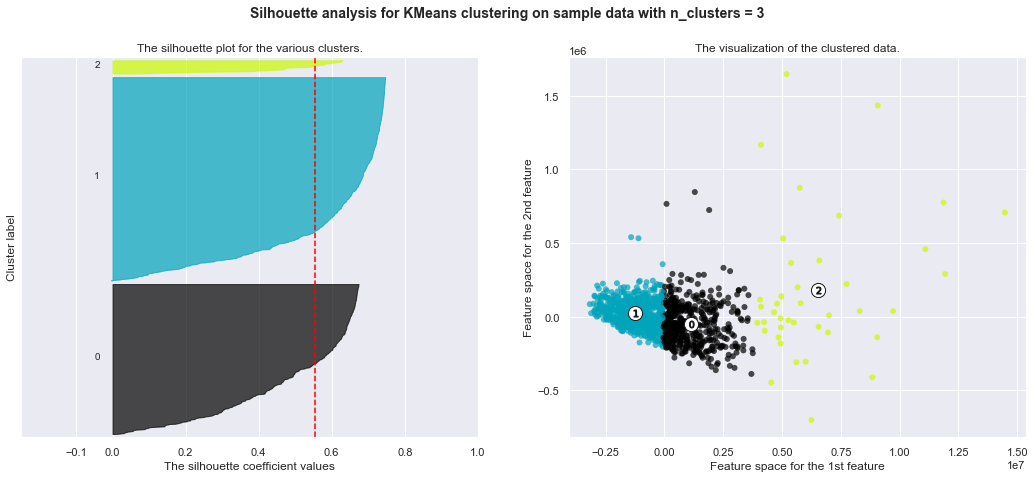

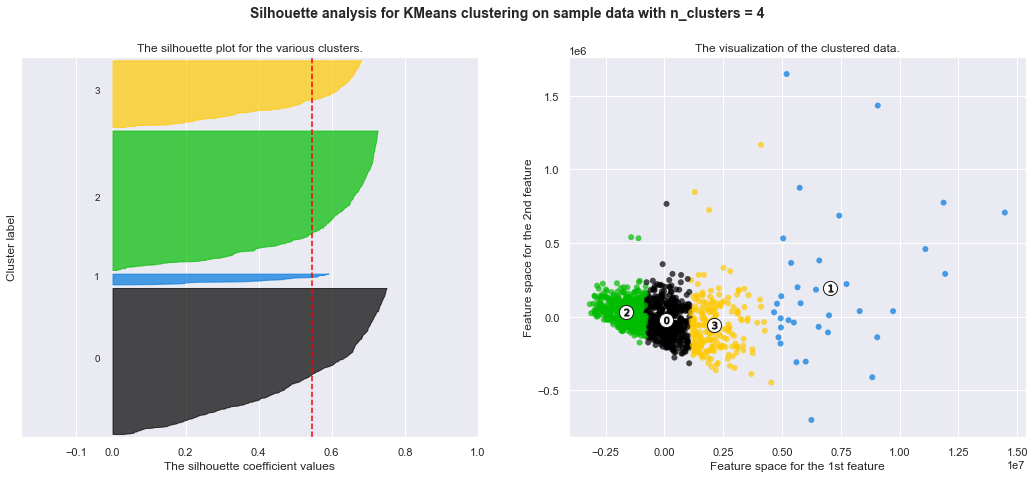

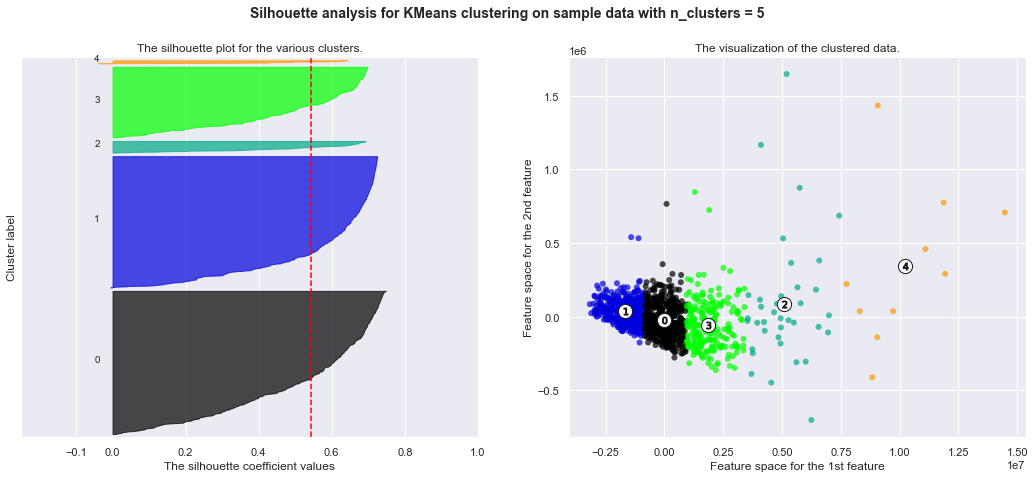

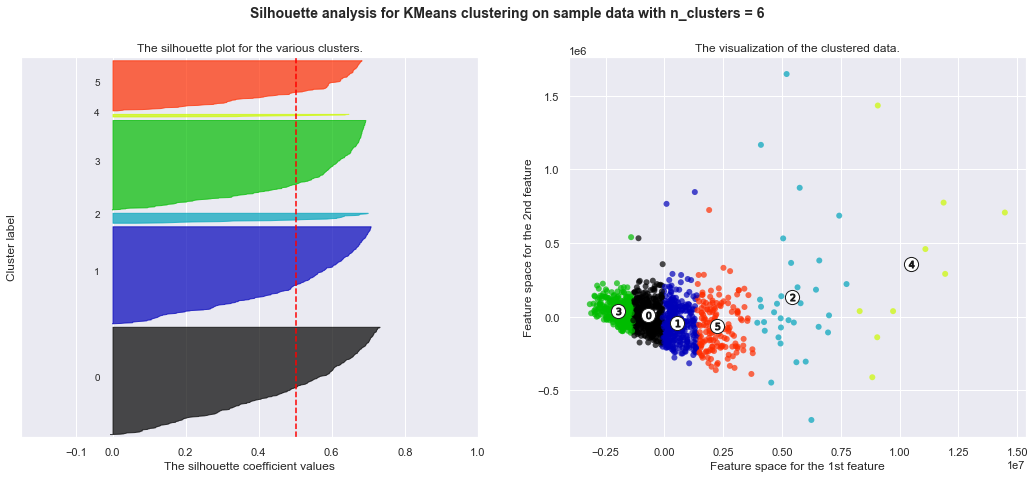

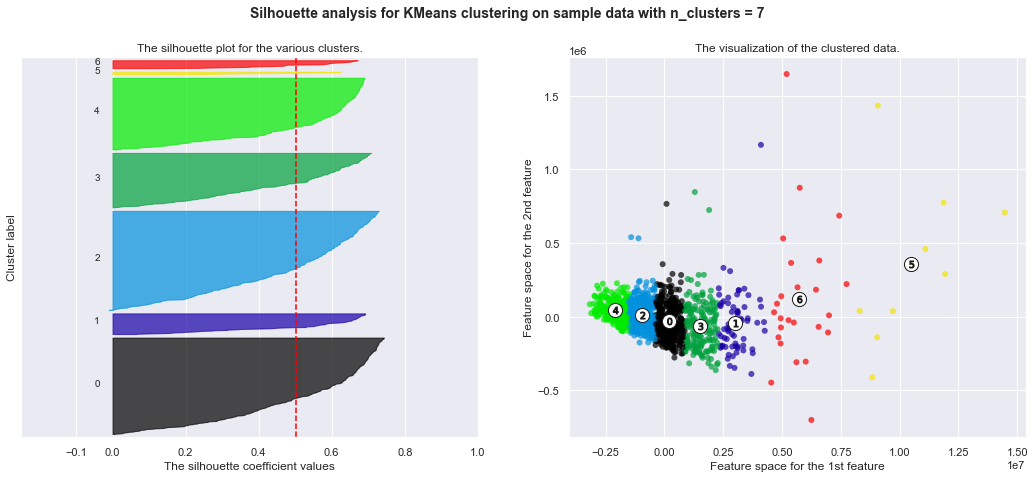

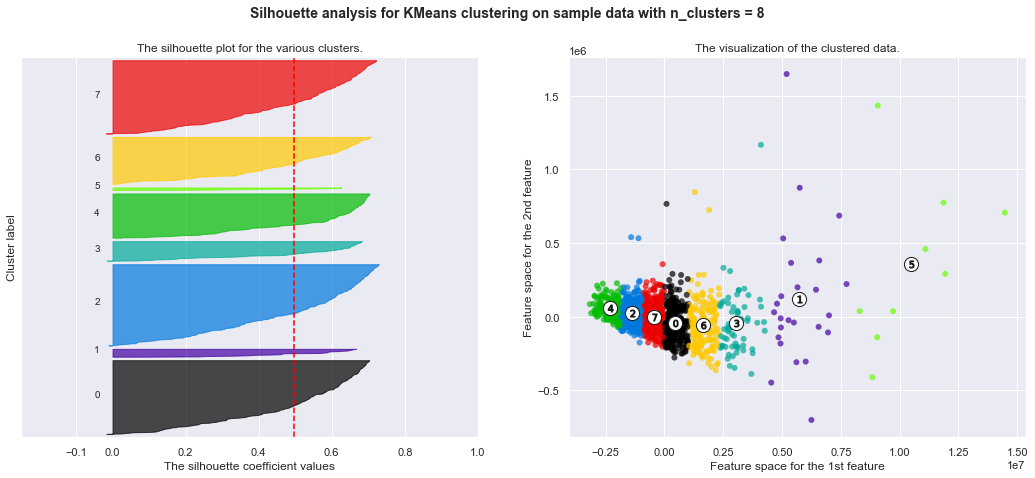

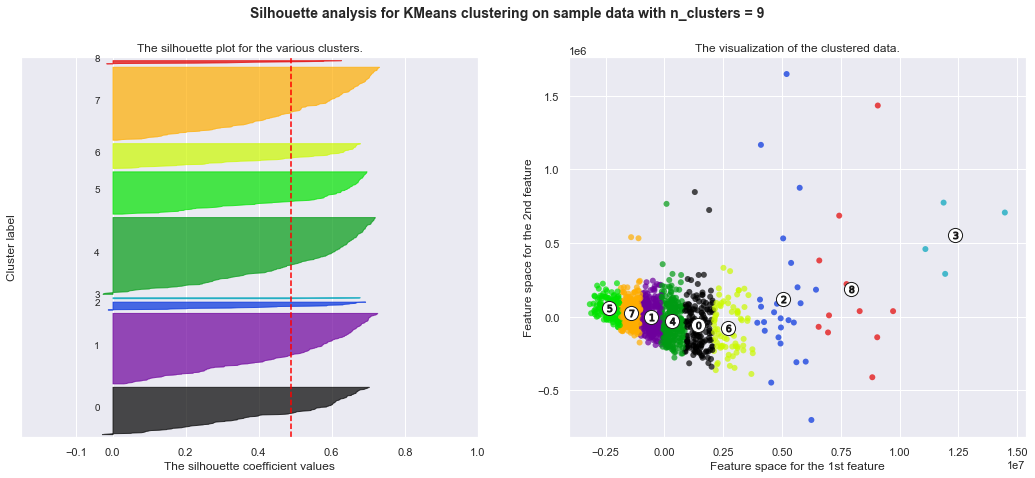

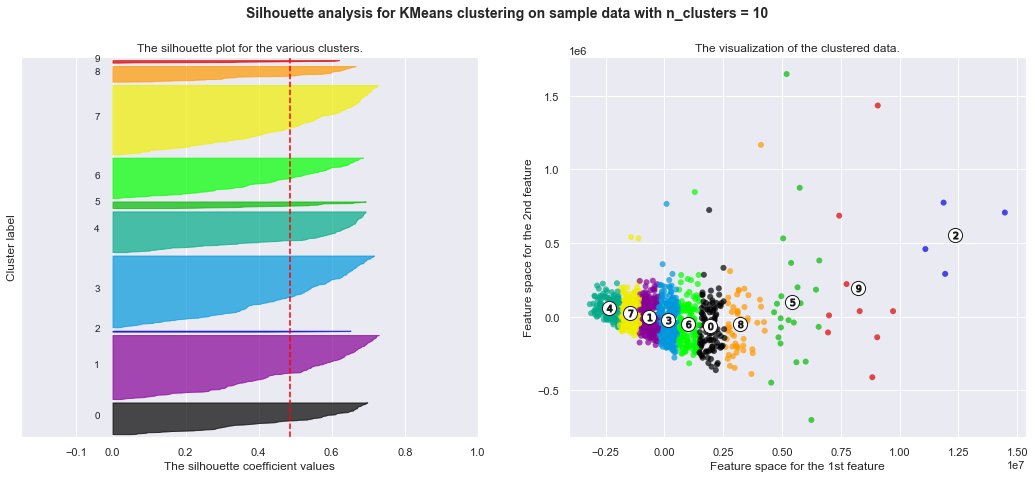

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm

avg_silhouette_scores = []

pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)
pca1,pca2 = zip(*X_pca)

for n_clusters in Krange:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the cluster_model with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    cluster_model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = cluster_model.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    avg_silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca1, pca2, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = cluster_model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [146]:
df2 = pd.read_csv('store.csv')

In [147]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [148]:
df2 = df2.set_index('Store')

In [149]:
df2.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [152]:
df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [22]:
df_store.shape

(1115, 6)

In [23]:
new_df_store = pd.concat([df_store, df2], axis=1)

In [24]:
new_df_store.head()

,Customers,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,
1,440523,3766,781,360,3716854,193,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,457855,3766,784,360,3883858,167,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,584310,3766,779,360,5408261,170,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,1036254,3766,784,360,7556507,173,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,418588,3766,779,360,3642818,172,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


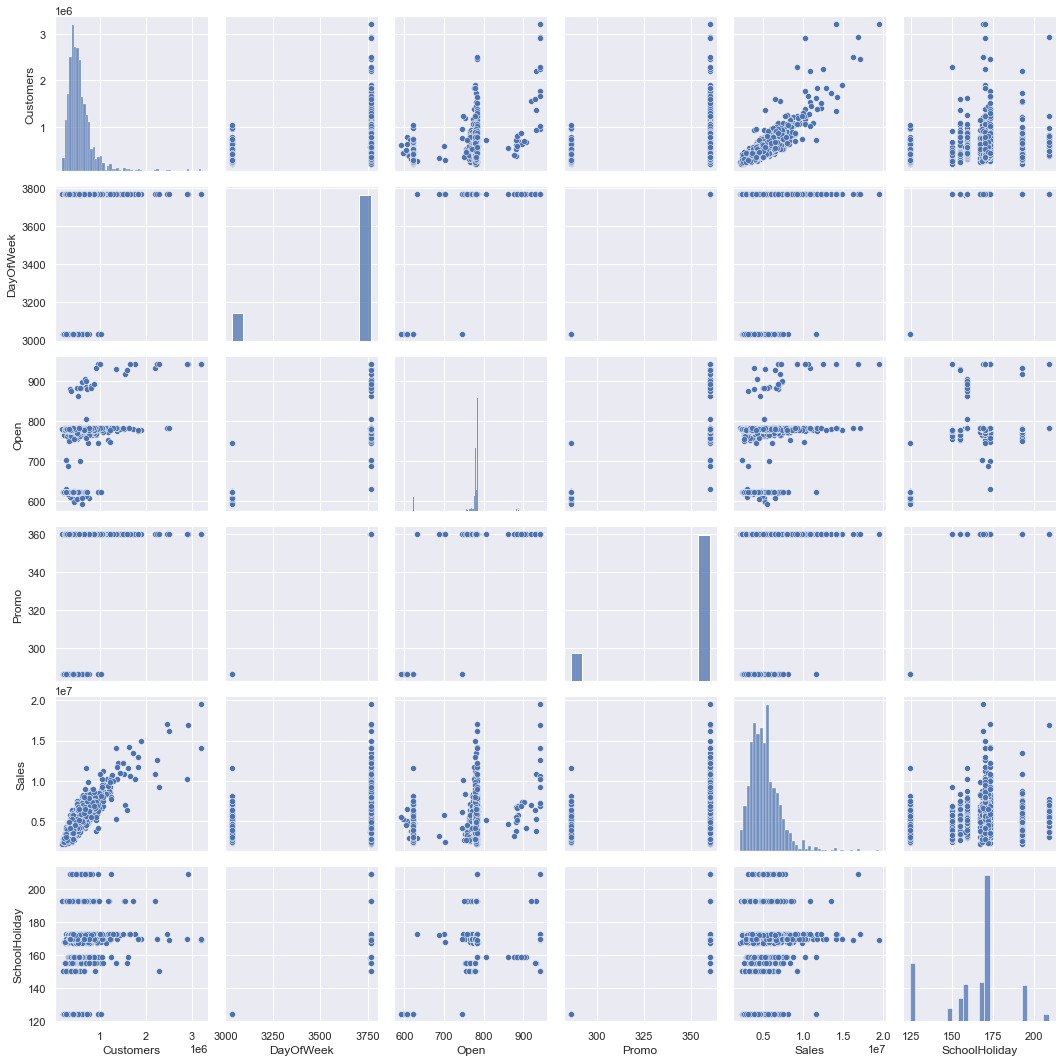

In [25]:
sns.pairplot(new_df_store)

In [32]:
new_df_store.head()

,Customers,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,
1,440523,3766,781,360,3716854,193,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,457855,3766,784,360,3883858,167,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,584310,3766,779,360,5408261,170,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,1036254,3766,784,360,7556507,173,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,418588,3766,779,360,3642818,172,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [83]:
process = data_process(new_df_store)


In [80]:
process.data_info()

,column,counts,unique_value_pct,nan_pct,data_type
4,Sales,1115,100.0000,0.0000,int64
0,Customers,1113,99.8206,0.0000,int64
8,CompetitionDistance,654,58.6547,0.2691,float64
2,Open,70,6.2780,0.0000,int64
12,Promo2SinceWeek,24,2.1525,48.7892,float64
10,CompetitionOpenSinceYear,23,2.0628,31.7489,float64
5,SchoolHoliday,13,1.1659,0.0000,int64
9,CompetitionOpenSinceMonth,12,1.0762,31.7489,float64
13,Promo2SinceYear,7,0.6278,48.7892,float64
6,StoreType,4,0.3587,0.0000,object


In [84]:
process.convert_dtype()

,Customers,DayOfWeek,Open,Promo,Sales,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
Store,,,,,,,,,,,,,,,,,,,,,
1,440523,3766,781,360,3716854,193,1270.0,9.0,2008.0,0,...,0,0,1,0,1,0,0,0,0,0
2,457855,3766,784,360,3883858,167,570.0,11.0,2007.0,1,...,1,0,0,0,1,0,0,0,1,0
3,584310,3766,779,360,5408261,170,14130.0,12.0,2006.0,1,...,1,0,0,0,1,0,0,0,1,0
4,1036254,3766,784,360,7556507,173,620.0,9.0,2009.0,0,...,0,0,1,0,0,0,1,0,0,0
5,418588,3766,779,360,3642818,172,29910.0,4.0,2015.0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,351883,3766,779,360,4091076,170,1900.0,6.0,2014.0,1,...,1,0,0,0,1,0,0,0,1,0
1112,653276,3766,779,360,7974294,170,1880.0,4.0,2006.0,0,...,0,0,1,0,0,0,1,0,0,0
1113,562151,3766,784,360,5196242,159,9260.0,NaN,NaN,0,...,1,0,0,0,0,0,1,0,0,0


In [70]:
process2= data_process(df2.drop('PromoInterval', axis=1))

In [71]:
process2.data_info()

,column,counts,unique_value_pct,nan_pct,data_type
2,CompetitionDistance,654,58.6547,0.2691,float64
6,Promo2SinceWeek,24,2.1525,48.7892,float64
4,CompetitionOpenSinceYear,23,2.0628,31.7489,float64
3,CompetitionOpenSinceMonth,12,1.0762,31.7489,float64
7,Promo2SinceYear,7,0.6278,48.7892,float64
0,StoreType,4,0.3587,0.0000,object
1,Assortment,3,0.2691,0.0000,object
5,Promo2,2,0.1794,0.0000,int64


In [72]:
process2.convert_dtype()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
Store,,,,,,,,,,,,,
1,1270.0,9.0,2008.0,0,NaN,NaN,0,0,1,0,1,0,0
2,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0,0,1,0,0
3,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0,0,1,0,0
4,620.0,9.0,2009.0,0,NaN,NaN,0,0,1,0,0,0,1
5,29910.0,4.0,2015.0,0,NaN,NaN,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1900.0,6.0,2014.0,1,31.0,2013.0,1,0,0,0,1,0,0
1112,1880.0,4.0,2006.0,0,NaN,NaN,0,0,1,0,0,0,1
1113,9260.0,NaN,NaN,0,NaN,NaN,1,0,0,0,0,0,1
